# Аналитика в Яндекс.Афише
[Загрузка данных и подготовьте их к анализу](#1-bullet)

[Отчеты и метрики](#2-bullet)

* [Продукт](#3-bullet) Количество людей, которые пользуются продуктом в день, неделю, месяц. Количество сессий в деннь. Частота возвращений.
* [Продажи](#4-bullet)Когда люди начинают покупать? Количество покупок за период. Средний чек. Сколько денег приносят? (LTV)
* [Маркетинг](#5-bullet) Сколько денег потратили? Всего / на каждый источник / по времени. Сколько стоило привлечение одного покупателя из каждого источника? На сколько окупились расходы? (ROI)

[Вывод. Рекомендации](#6-bullet)


## Загрузка данных и подготовьте их к анализу<a id='1-bullet'></a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
visits = pd.read_csv('C:/Users/Гаяне/Desktop/яндекс практика/visits_log.csv')
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [2]:
visits.columns = map(str.lower, visits.columns) #преобразование столбцов к нижнему регистру
visits = visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'}) #переменование столбцов

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Переводим даты в формат дат
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [5]:
orders = pd.read_csv('C:/Users/Гаяне/Desktop/яндекс практика/orders_log.csv')
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [6]:
orders.columns = map(str.lower, orders.columns) #преобразование столбцов к нижнему регистру
orders = orders.rename(columns={'buy ts': 'buy_ts'}) #переименование столбцов
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
# Переводим даты в формат дат
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
costs= pd.read_csv('C:/Users/Гаяне/Desktop/яндекс практика/costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
# Переводим даты в формат дат
costs['dt'] = pd.to_datetime(costs['dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


## Отчеты и метрики<a id='2-bullet'></a> 

### Продукт<a id='3-bullet'></a> 

#### Количество пользователей по дням, по неделе и по месяцу

In [11]:
# Добавляем столбцы с днем, неделей и месяцем
visits['start_day'] = visits['start_ts'].dt.date
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
visits['start_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_year'] = visits['start_ts'].dt.year
visits.head()


,device,end_ts,source_id,start_ts,uid,start_day,start_month,start_week,start_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21,2017


#### Пользователи по дням

In [12]:
visits_person_day= visits.groupby(['start_day']).agg({'uid':  'nunique'})
visits_person_day.describe()

,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


In [13]:
dau= visits.groupby(['start_day']).agg({'uid':  'nunique'}).mean()
print('DAU =' ,int(dau))

DAU = 907


Text(0, 0.5, 'Пользователи')

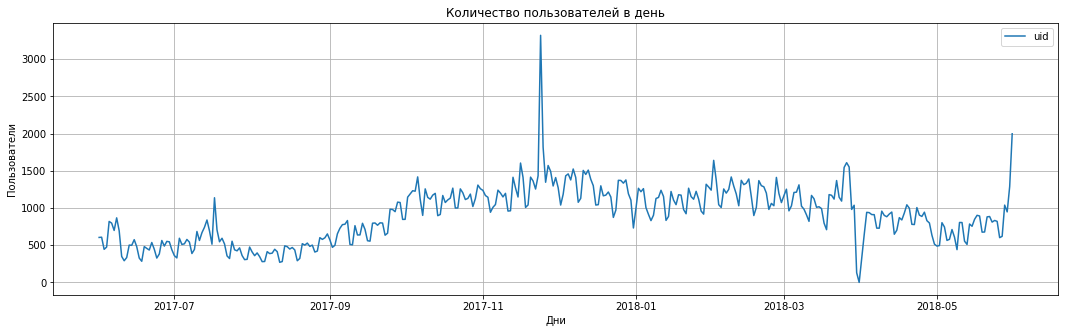

In [14]:
visits_person_day.plot(figsize=(18, 5),grid=True);
plt.title("Количество пользователей в день")
plt.xlabel("Дни")
plt.ylabel("Пользователи")


#### Вывод по количеству пользователей по дням
Бросаются в глаза выбивающиеся значения 2017/11/24 было 3319, 2018/03/31 был всего 1 пользователь. В последнем случае, это скорее всего какой-то сбой программы, может быть проблемы с сайтом, и пользователи не могли зайти. Максимальное значение 24 ноября - возможно, акция. Надо уточнить у заказчиков. В целом похоже, что динамика положительная, хотя в мае был небольшой спад. В среднем в день бывает 907 пользователей.

#### Пользователи в месяц

In [15]:
visits_person_month= visits.groupby(['start_month']).agg({'uid': 'nunique'})
visits_person_month.describe()

,uid
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


Text(0, 0.5, 'Пользователи')

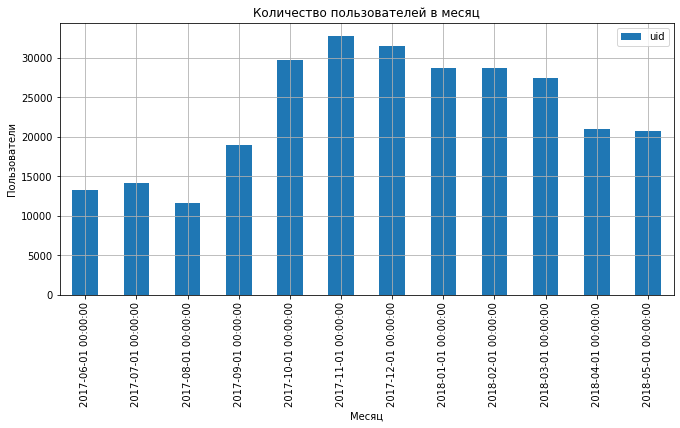

In [16]:
visits_person_month.plot(kind='bar', figsize=(11, 5),grid=True);
plt.title("Количество пользователей в месяц")
plt.xlabel("Месяц")
plt.ylabel("Пользователи")

#### Вывод по количеству пользователей по месяцам
Больше всего пользователей было с ноября 2017 по март 2018, в апреле и мае количество пользователей уменьшилось. В среднем в месяц бывает 23228 пользователей

#### Количество пользователей в неделю

Text(0, 0.5, 'Пользователи')

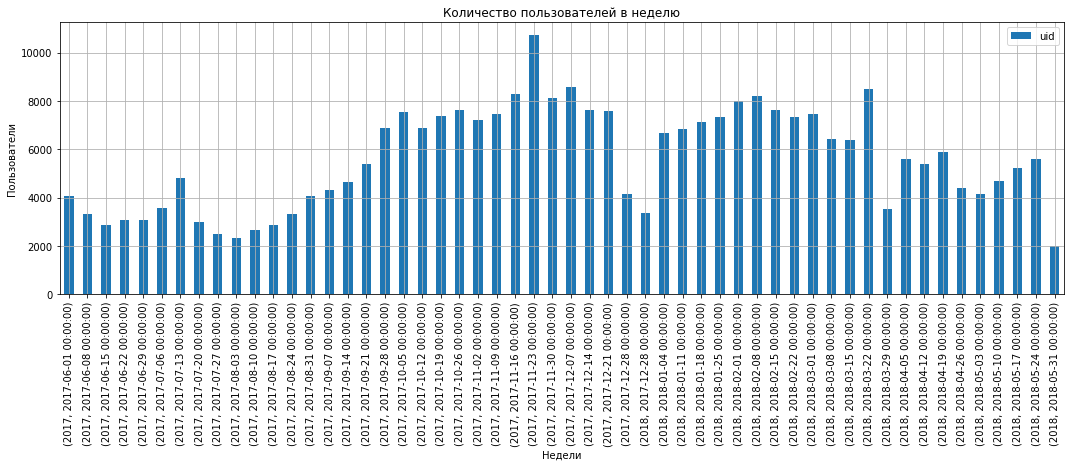

In [17]:
visits_person_week= visits.groupby(['start_year','start_week']).agg({'uid': 'nunique'})

visits_person_week.plot(kind='bar', figsize=(18, 5),grid=True);
plt.title("Количество пользователей в неделю")
plt.xlabel("Недели")
plt.ylabel("Пользователи")

In [18]:
wau=visits.groupby(['start_year','start_week']).agg({'uid': 'nunique'}).mean()
print('WAU=', int(wau))

WAU= 5621


In [19]:
visits_person_week.describe()


,uid
count,54.000000
mean,5621.703704
std,2098.487988
min,1997.000000
25%,3686.250000
50%,5599.500000
75%,7424.500000
max,10716.000000


#### Вывод по количеству пользователей в неделю
В среднем в неделю бывает 5716 пользователей. В худшие недели было 2021 пользователь, а в лучшие 10586

#### Количество сессий в день

In [20]:
session_day= visits.groupby(['start_day']).agg({'uid':  'count'}).mean()
print('Среднее количество сессий в день =', int(session_day))

Среднее количество сессий в день = 987


Text(0, 0.5, 'сессии')

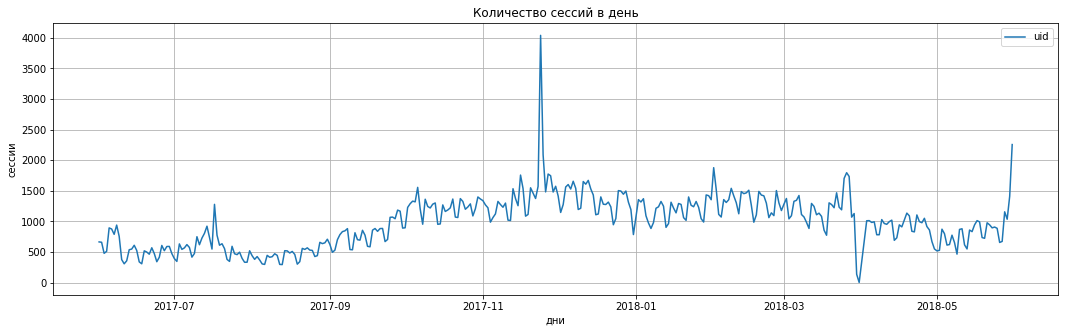

In [21]:
visits.groupby(['start_day']).agg({'uid':  'count'}).plot(figsize=(18, 5),grid=True);
plt.title("Количество сессий в день")
plt.xlabel("дни")
plt.ylabel("сессии")

Как и по другим данным видим, что в осенние и зимние месяцы больше всего сессий.

#### Длительность одной сессии

Длительность одной сессии чаще всего бывает 0    60
dtype: int64


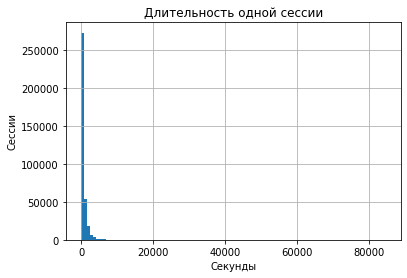

In [22]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].hist(bins=100) 
plt.title("Длительность одной сессии")
plt.xlabel("Секунды")
plt.ylabel("Сессии")
print('Длительность одной сессии чаще всего бывает', visits['session_duration'].mode())

 ####  Проверка показателей по устройствам

Длительность одной сессии чаще всего бывает 0    60
dtype: int64


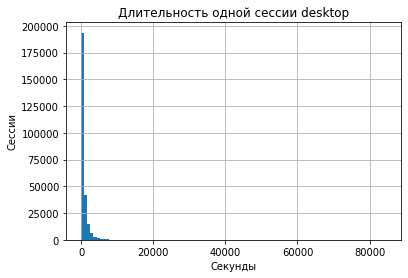

In [23]:
visits_desk = visits.query('device=="desktop"')
visits_desk['session_duration'] = (visits_desk['end_ts'] - visits_desk['start_ts']).dt.seconds
visits_desk['session_duration'].hist(bins=100) 
plt.title("Длительность одной сессии desktop")
plt.xlabel("Секунды")
plt.ylabel("Сессии")
print('Длительность одной сессии чаще всего бывает', visits_desk['session_duration'].mode())

Длительность одной сессии чаще всего бывает 0    60
dtype: int64


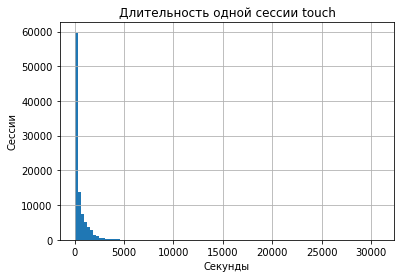

In [24]:
visits_touch = visits.query('device=="touch"')
visits_touch['session_duration'] = (visits_touch['end_ts'] - visits_touch['start_ts']).dt.seconds
visits_touch['session_duration'].hist(bins=100) 
plt.title("Длительность одной сессии touch")
plt.xlabel("Секунды")
plt.ylabel("Сессии")
print('Длительность одной сессии чаще всего бывает', visits_desk['session_duration'].mode())

Text(0, 0.5, 'сессии')

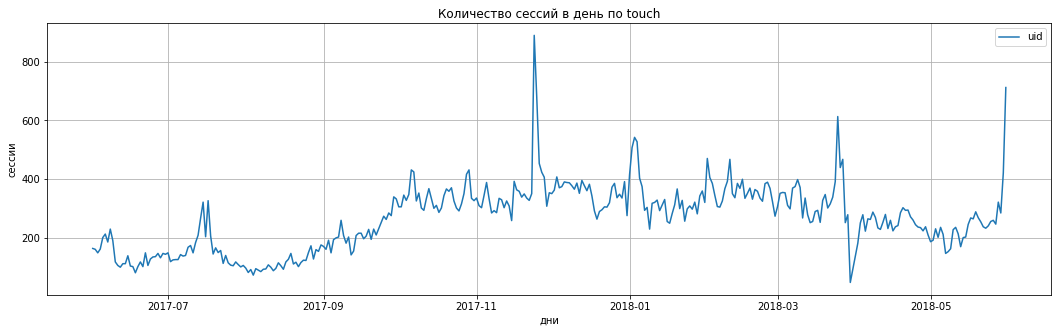

In [25]:
visits_touch.groupby(['start_day']).agg({'uid':  'count'}).plot(figsize=(18, 5),grid=True);
plt.title("Количество сессий в день по touch")
plt.xlabel("дни")
plt.ylabel("сессии")

Text(0, 0.5, 'сессии')

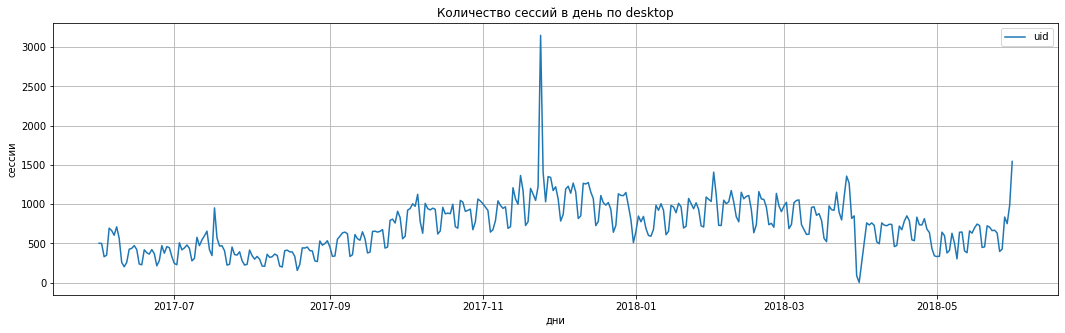

In [26]:
visits_desk.groupby(['start_day']).agg({'uid':  'count'}).plot(figsize=(18, 5),grid=True);
plt.title("Количество сессий в день по desktop")
plt.xlabel("дни")
plt.ylabel("сессии")

По устройствам нет разницы в динамике длительности сессии и количестве сессий, но с компьютеров заходят чаще

In [27]:
visits.head()

,device,end_ts,source_id,start_ts,uid,start_day,start_month,start_week,start_year,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21,2017,0


#### Удержание пользователь

In [28]:

first_activity_date = visits.groupby(['uid'])['start_month'].min()
first_activity_date.name = 'first_activity_date'
visits_n = visits.join(first_activity_date,on='uid')

visits_n['first_activity_month'] = visits_n['first_activity_date'].astype('datetime64[M]')

visits_n['cohort_lifetime'] = visits_n['start_month'] - visits_n['first_activity_month']
visits_n['cohort_lifetime'] = visits_n['cohort_lifetime'] / np.timedelta64(1,'M')
visits_n['cohort_lifetime'] = visits_n['cohort_lifetime'].round().astype('int')
cohorts = visits_n.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
retention_pivot


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>
    
отличная визуализация с помощью тепловой карты, молодец, что воспользовалась параметрами vmin, vmax</div>

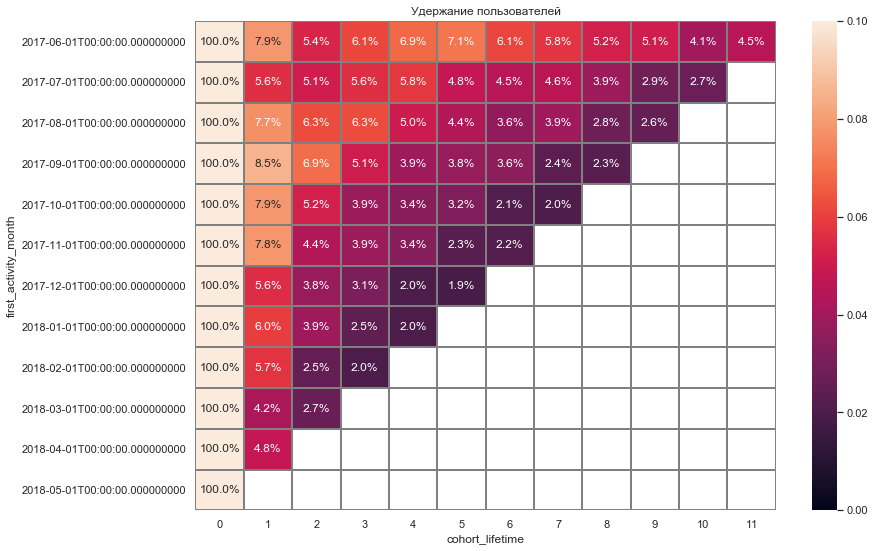

In [29]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Удержание пользователей')
sns.heatmap(retention_pivot, annot=True, vmin=0,vmax=0.1, fmt='.1%', linewidths=1, linecolor='gray'); 

#### Вывод по удержанию
Похоже, что пользователи не так часто возвращаются. Не больше 10%, а чаще в пределах 4% 

### Вывод по продукту
В среднем в день на Яндекс Афише бывает 907 пользователей в день,  5716 пользователей в неделю и 23228 пользователей в месяц. Длительность одной сессии чаще всего бывает 60 секунд. Пользователи редкто возвращаются. Самые высокие показатели в первой когорте. В первый месяц пользователи более или менее активно возвращаются, с каждым месяцем все реже. В осенние месяцы люди чаще возвращаются

### Продажи <a id='4-bullet'></a> 

Когда люди начинают покупать?
Сколько раз покупают за период?
Какой средний чек?
Сколько денег приносят? (LTV)

In [30]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [31]:
first_activity_date_visits = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_activity_date_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
orders_visits = first_activity_date_orders.merge(first_activity_date_visits, on='uid', how='left')
orders_visits['buy_time'] = (orders_visits['buy_ts'] - orders_visits['start_ts']).dt.seconds

In [32]:
print('Среднее время от начала сессии до покупки',orders_visits['buy_time'].mean()/60)
print('Медиана времени от начала сессии до покупки',orders_visits['buy_time'].median()/60)
print('Мода времени от начала сессии до покупки',orders_visits['buy_time'].mode()/60)

Среднее время от начала сессии до покупки 249.16469074281957
Медиана времени от начала сессии до покупки 16.0
Мода времени от начала сессии до покупки 0    1.0
dtype: float64


Text(0, 0.5, 'Пользователи')

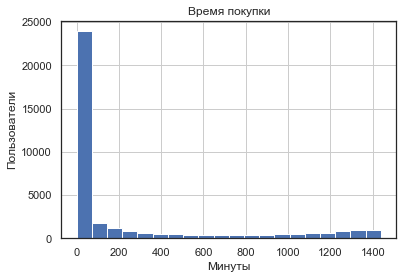

In [33]:
(orders_visits['buy_time']/60).hist(bins=20)
plt.title("Время покупки")
plt.xlabel("Минуты")
plt.ylabel("Пользователи")

#### Вывод по времени покупки
Очевидно, что не все люди заходят на сайт Яндекс Афиши, чтобы сразу же что-то купить.С момента первого захода может пройти немало времени, прежде, чем пользователь надумает сделать покупку. Но если уж надумали покупать, то большинство пользователей укладываются в 1 минуту. Это утешает, потому что именно такое среднее время пребывания на сайте. Данные по медиане и тем более среднему не показательны. 

#### Покупка за период

In [34]:
# За период берем месяц и год
orders['month_buy'] = orders['buy_ts'].astype('datetime64[M]')
orders_month = orders.groupby(['uid', 'month_buy']).agg({'buy_ts': 'count'})
orders['year_buy'] = orders['buy_ts'].astype('datetime64[Y]')
orders_year = orders.groupby(['uid', 'year_buy']).agg({'buy_ts': 'count'})


In [35]:
orders_month['buy_ts'].describe()

count    41019.000000
mean         1.229065
std          1.384665
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         67.000000
Name: buy_ts, dtype: float64

In [36]:
orders_year['buy_ts'].describe()

count    38149.000000
mean         1.321529
std          2.675203
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        182.000000
Name: buy_ts, dtype: float64

Text(0.5, 1.0, 'Продажи по месяцам')

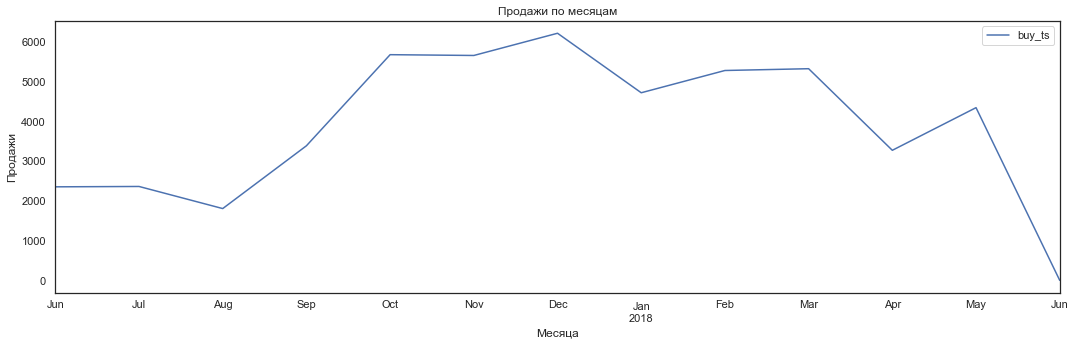

In [37]:
orders.groupby(['month_buy']).agg({'buy_ts': 'count'}).plot(figsize=(18, 5))
plt.xlabel("Месяца")
plt.ylabel("Продажи")
plt.title("Продажи по месяцам")

Text(0.5, 1.0, 'Выручка по месяцам')

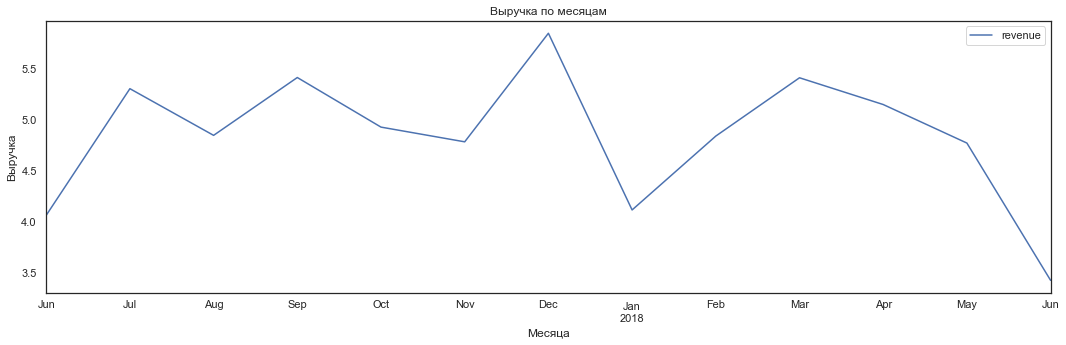

In [38]:
orders.groupby(['month_buy']).agg({'revenue': 'mean'}).plot(figsize=(18, 5))
plt.xlabel("Месяца")
plt.ylabel("Выручка")
plt.title("Выручка по месяцам")

#### Вывод по покупкам за период
В среднем пользователь совершает 1.2 покупки в месяц и 1.3 покупки в год. Учитывая, что пользователи редко возвращаются, это нормально. Больше всего продаж в осенне-зимний период. Больше всего денег в декабре и в декабре самый высокий средний чек, в январе чек резко падает. Летние периоды самые невыгодные. 

#### Какой средний чек?

Text(0.5, 1.0, 'Средний чек по месяцам')

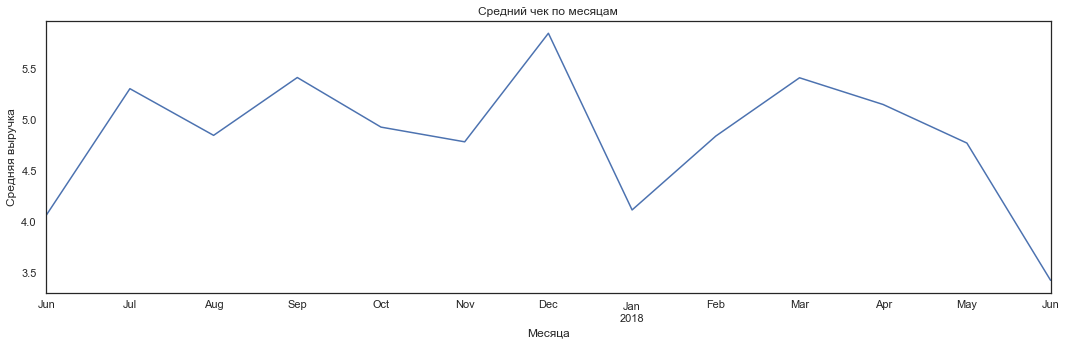

In [39]:
revenue_by_month = orders.groupby(['month_buy']).agg({'revenue': 'sum', 'uid':'count' })
revenue_by_month['revenue_by_month'] = revenue_by_month['revenue']/revenue_by_month['uid']
revenue_by_month['revenue_by_month'].plot(figsize=(18, 5)) 
plt.xlabel("Месяца")
plt.ylabel("Средняя выручка")
plt.title("Средний чек по месяцам")

In [40]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

#### Вывод
Средняя выручка с каждой покупки 4.9 (в условиях не написано, в чем измерение, будем считать, что в тысячах рублей) 

#### Сколько денег приносят? (LTV)

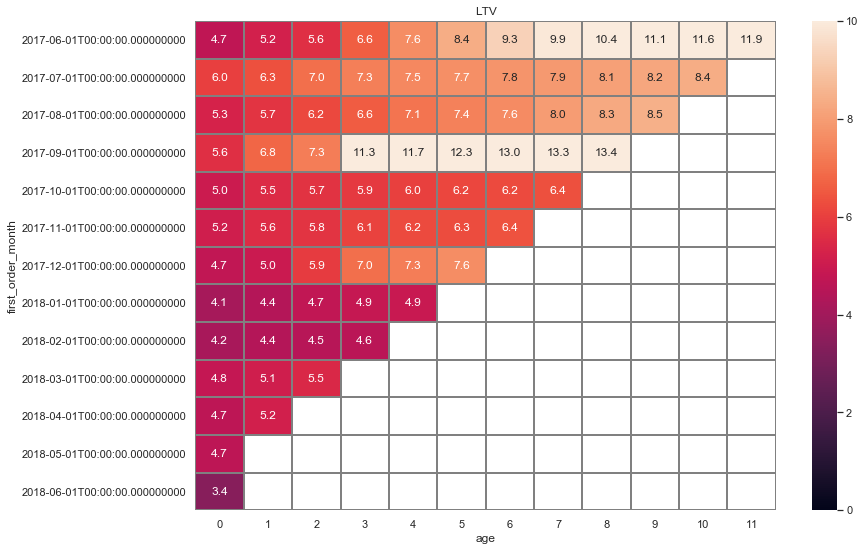

In [41]:
#Считаем среднюю прибыль с каждой когорты 
first_orders = orders.groupby('uid')['month_buy'].min().reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes1 = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes1.colums = ['first_order_month', 'n_buyers']
orders_new = pd.merge(orders,first_orders, on='uid')
cohorts1 = orders_new.groupby(['first_order_month','month_buy']).agg({'revenue': 'sum'}).reset_index()

report1 = pd.merge(cohort_sizes1, cohorts1, on='first_order_month')
report1['age'] = (report1['month_buy'] - report1['first_order_month']) / np.timedelta64(1, 'M')
report1['age'] = report1['age'].round().astype('int')
report1['ltv'] = report1['revenue'] / report1['uid']
output1 = report1.pivot_table( index='first_order_month',  columns='age', values='ltv',   aggfunc='mean')
    
output1.fillna('')
output2=output1.cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output2, annot=True, fmt='.1f', vmin=0,vmax=10, linewidths=1, linecolor='gray'); 

In [42]:
# Сколько в среднем принесла одна когорта в месяц год
year_revenue = 11.9/12


print(year_revenue)

0.9916666666666667


#### Вывод по прибыли
Самыми прибыльными когортами были сентябрьская, декабрьская и июньская. В среднем самаяя старая когорта приносила в месяц 0.9 у.е.

### Маркетинг <a id='5-bullet'></a> 

#### Затраты на рекламу (всего, на каждый источник, на период) 

In [43]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [44]:
print('Всего на рекламу потратили', costs['costs'].sum())


Всего на рекламу потратили 329131.62


In [45]:
# Затраты на каждый рекламный источник
costs_sourse = costs.groupby('source_id').agg({'costs': 'sum'})
costs_sourse

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Text(0, 0.5, 'Потраченные средства')

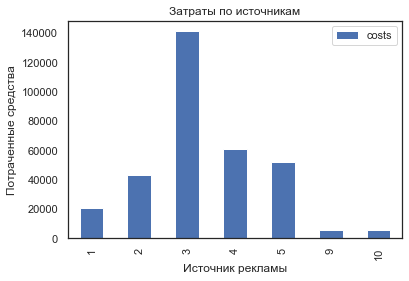

In [46]:
costs_sourse.plot(kind='bar');
plt.title("Затраты по источникам")
plt.xlabel("Источник рекламы")
plt.ylabel("Потраченные средства")

In [47]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['day']= costs['dt'].astype('datetime64[D]')
costs['year']= costs['dt'].astype('datetime64[Y]')
costs_month = costs.groupby('month').agg({'costs':'sum'})
costs_year = costs.groupby('year').agg({'costs':'sum'})
costs_day = costs.groupby('day').agg({'costs':'sum'})
print('Затраты в среднем в месяц', costs_month.mean())
print('Затраты в среднем в год', costs_year.mean())
print('Затраты в среднем в день', costs_day.mean())

Затраты в среднем в месяц costs    27427.635
dtype: float64
Затраты в среднем в год costs    164565.81
dtype: float64
Затраты в среднем в день costs    904.207747
dtype: float64


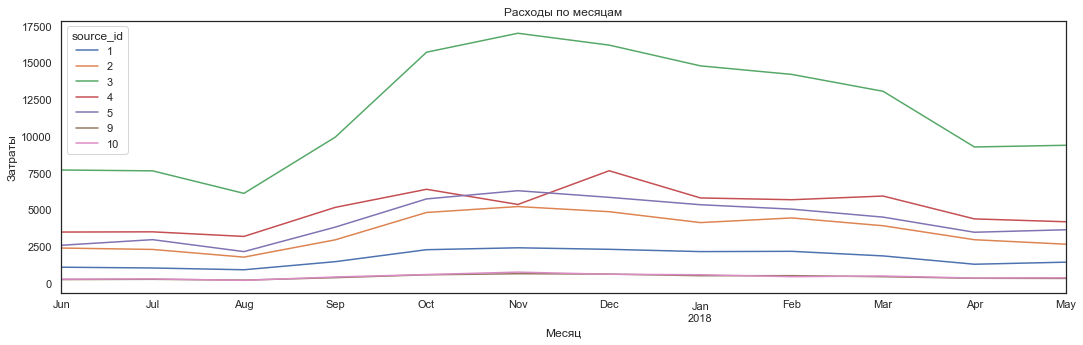

In [48]:
costs_month_pt = costs.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_month_pt .plot(figsize = (18,5))
plt.title('Расходы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()


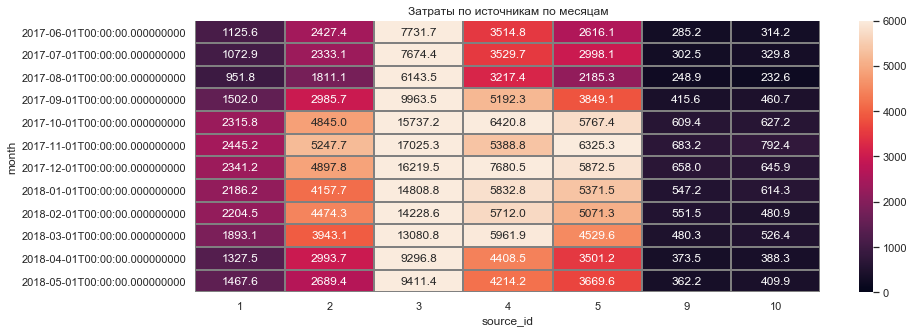

In [49]:
costs_by_source = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
costs_pivot = costs_by_source.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
plt.figure(figsize=(14, 5))
plt.title('Затраты по источникам по месяцам')
sns.heatmap(costs_pivot, annot=True, vmin=0,vmax=6000, fmt='.1f', linewidths=1, linecolor='gray')

#### Вывод
Самый дорогостоящий источник 3 на него потратили 141321.63, меньше всего денег тратится на 9 источник - на него потратили -5517
В среднем на реклму тратится в год - 164565.81, в месяц -27427.63, в день -   904.2. Больше всего затрат было в осенне-зимние время. Меньше всего летом. Это и подтверждает то, что осенью больше всего было покупок. 

#### Стоимость привлечения одного покупателя из каждого источника


In [50]:
# объединяем таблицы и удаляем получившиеся дубликаты
merge_orders_visits = orders.merge(visits,on='uid',how='inner').drop_duplicates(subset=['buy_ts','uid'])


In [51]:
merge_orders_visits_group = merge_orders_visits[['buy_ts','uid','source_id','revenue']].groupby('source_id').agg({'uid': 'count'})

In [52]:
# Объединяем таблицы по источнику рекламы
cost_uid = costs_sourse.merge(merge_orders_visits_group, on='source_id')
# Делим стоимость рекламного источника на количество покупателей
cac = cost_uid['costs'] / cost_uid['uid']
cac

source_id
1      3.119220
2      5.534787
3     12.916701
4      4.987228
5      5.559302
9      2.687526
10     4.012743
dtype: float64

In [53]:
cac_all = (cost_uid['costs'].sum()) / (cost_uid['uid'].sum())
cac_all

6.528575792438606

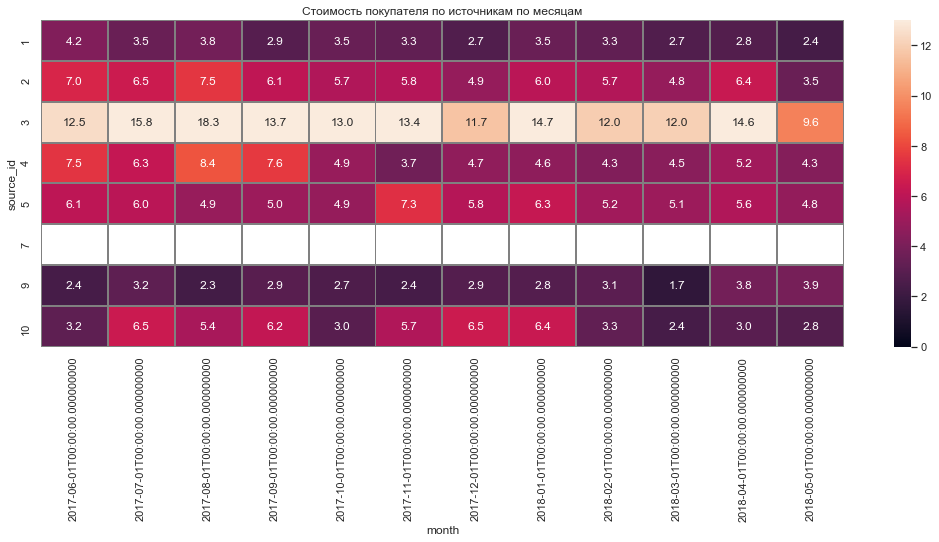

In [54]:
cost_t= costs.pivot_table(index ='source_id', columns = 'month', values ='costs', aggfunc='sum')

merge_orders_visits = orders.merge(visits,on='uid',how='inner').drop_duplicates(subset=['buy_ts','uid'])

payers_costs = merge_orders_visits.query('month_buy != "2018-06-01"').pivot_table(index ='source_id', columns = 'month_buy', values ='uid', aggfunc='count')

payers_costs

cost_t/payers_costs

plt.figure(figsize=(18, 6))
plt.title('Стоимость покупателя по источникам по месяцам')
sns.heatmap(cost_t/payers_costs, annot=True, vmin=0,vmax=13, fmt='.1f', linewidths=1, linecolor='gray');

#### Вывод по привлечению покупателей по источникам
Самый дорогой источник 3, Дешевле всего привлекать с помощью источника 9.

#### Окупаемость расходов (ROI)

In [55]:
# Посмотрим в целом на окупаемость по разным рекламным источникам
revenue55 =  merge_orders_visits[['buy_ts','uid','source_id','revenue']].groupby('source_id').agg({'revenue': 'sum'})

costs_revenue = costs_sourse.merge(revenue55, on='source_id')
romi = ((costs_revenue['revenue'] - costs_revenue['costs'])/costs_revenue['costs'])*100
print('ROMI по источникам', romi)
print('ROMI итоговое', romi.sum())

ROMI по источникам source_id
1     85.088851
2     52.203427
3    -68.640554
4    -14.071301
5    -22.024399
9     28.264483
10   -29.388629
dtype: float64
ROMI итоговое 31.431877739443404


В целом видим, что 1, 2 и 9 источник окупаются. Самый дорогой источник 3 самый убыточный. НО нужен более детальный анализ по когортам. Может быть, что вложенные деньги еще не успели окупиться. Проверим насколько в целом хорошо работают маркетологи.

In [56]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
monthly_costs_sor = costs.groupby('month').agg({'costs':'sum'})


In [57]:
first_activity_date = visits.groupby(['uid'])['start_month'].min()
first_activity_date.name = 'first_activity_date'
visits_n = visits.join(first_activity_date,on='uid')



visits_n['first_activity_month'] = visits_n['first_activity_date'].astype('datetime64[M]')

visits_n['cohort_lifetime'] = visits_n['start_month'] - visits_n['first_activity_month']
visits_n['cohort_lifetime'] = visits_n['cohort_lifetime'] / np.timedelta64(1,'M')
visits_n['cohort_lifetime'] = visits_n['cohort_lifetime'].round().astype('int')
cohorts = visits_n.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# определяем источник пользователя
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})
# соединяем первые покупки и источники 
payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
# считаем ltv
ltv = payers.merge(orders, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv = ltv.cumsum(axis = 1)
# добавляем размеры когорт и делим на них
# div(ltv['cohort_size'], axis = 0) берет столбец cohort_size и делит на него каждый столбец фрейма
cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(ltv)
# считаем САС
cac = costs.groupby('source_id').agg({'costs': 'sum'}).merge(cohort_sizes, on = 'source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
display(cac)
# считаем ROI
roi = ltv.merge(cac[['cac']], on = 'source_id')
roi = roi.div(roi['cac'], axis = 0).drop(columns = 'cac')
roi

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931
4,4.584762,4.738128,4.852278,4.948617,5.068362,5.226563,5.342363,5.391025,5.410340,5.448244,5.502627,5.505380,5.506685
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.880901,4.167390,4.408024,4.678888,4.788189,4.935588,5.059127,5.126608,5.244430,5.284972,5.293566,5.293566,5.293566
10,3.164131,3.227434,3.254695,3.302558,3.316576,3.319217,3.332724,3.343348,3.346102,3.348631,3.348631,3.348631,3.348631


,costs,cohort_size,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.856648,0.995056,1.098073,1.188049,1.256449,1.287311,1.325542,1.372997,1.418138,1.454263,1.469110,1.485245,1.492351
2,0.554541,0.659718,0.795940,0.921722,0.974672,1.022526,1.041939,1.060528,1.078791,1.083886,1.093177,1.095915,1.096191
3,0.331831,0.350476,0.360589,0.371142,0.376696,0.379623,0.381432,0.383408,0.384793,0.385172,0.385559,0.385643,0.385725
4,0.772915,0.798770,0.818014,0.834255,0.854442,0.881112,0.900634,0.908838,0.912094,0.918484,0.927652,0.928116,0.928336
5,0.657502,0.684862,0.732506,0.915536,0.947140,0.970386,0.986304,0.998329,1.006381,1.014569,1.015436,1.016716,1.016750
9,0.765279,0.821772,0.869223,0.922635,0.944188,0.973254,0.997615,1.010922,1.034155,1.042150,1.043844,1.043844,1.043844
10,0.722222,0.736671,0.742894,0.753818,0.757018,0.757621,0.760704,0.763129,0.763757,0.764335,0.764335,0.764335,0.764335


#### Вывод
Затраты на рекламу у июньской когорты окупились за 6 месяцев, сентябрьская за 4 месяца. Посмотрим подробнее по отдельности на рекламные источники по когортам

In [59]:
cohort_9 = merge_orders_visits.query('source_id == 9')
monthly_costs9 =  costs.query('source_id == 9').groupby('month').agg({'costs':'sum'})
cohort_9 = merge_orders_visits.query('source_id == 9')
first_month_9 = cohort_9.groupby('uid')['month_buy'].min().reset_index()
first_month_9.columns = ['uid','first_month_buy']
orders_first_month9 = orders.merge(first_month_9, on='uid')

cohort_sizes9 = first_month_9.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_sizes9.colums = ['first_month_buy', 'n_buyers']





revenue9= (orders_first_month9.groupby(['month_buy', 'first_month_buy']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index())
revenue9['age'] = ((revenue9['month_buy'] - revenue9['first_month_buy'])/np.timedelta64(1, 'M')).round().astype('int')
revenue9['ltv'] =revenue9['revenue']/revenue9['uid']

report9 = pd.merge(cohort_sizes9, revenue9, on='first_month_buy')
report91= pd.merge(revenue9, monthly_costs9, left_on='first_month_buy', right_on='month')
report91['cac'] = report91['costs'] / report91['uid']

report91['romi'] = report91['ltv'] / report91['cac']
output91 = report91.pivot_table(
        index='first_month_buy', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output91.cumsum(axis=1).round(2) 
output91.cumsum(axis=1).mean(axis=0)


age
0     1.013361
1     1.143924
2     1.267759
3     1.345007
4     1.459570
5     1.655701
6     1.705786
7     1.989203
8     2.175699
9     2.890911
10    1.815423
dtype: float64

9 источник рекламы окупается сразу же

In [60]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
monthly_costs.head() 

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [61]:
cohort_3 = merge_orders_visits.query('source_id == 3')
monthly_costs3 =  costs.query('source_id == 3').groupby('month').agg({'costs':'sum'})
cohort_3 = merge_orders_visits.query('source_id == 3')
first_month_3 = cohort_3.groupby('uid')['month_buy'].min().reset_index()
first_month_3.columns = ['uid','first_month_buy']
orders_first_month3 = orders.merge(first_month_3, on='uid')

cohort_sizes3 = first_month_3.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_sizes3.colums = ['first_month_buy', 'n_buyers']


revenue3= (orders_first_month3.groupby(['month_buy', 'first_month_buy']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index())
revenue3['age'] = ((revenue3['month_buy'] - revenue3['first_month_buy'])/np.timedelta64(1, 'M')).round().astype('int')
revenue3['ltv'] =revenue3['revenue']/revenue3['uid']

report3 = pd.merge(cohort_sizes3, revenue3, on='first_month_buy')
report31= pd.merge(revenue3, monthly_costs3, left_on='first_month_buy', right_on='month')
report31['cac'] = report31['costs'] / report31['uid']

report31['romi'] = report31['ltv'] / report31['cac']
output31 = report31.pivot_table(
        index='first_month_buy', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output31.cumsum(axis=1).round(2) 
output31.cumsum(axis=1).mean(axis=0)


age
0     0.283503
1     0.291111
2     0.302557
3     0.309855
4     0.318609
5     0.332169
6     0.338037
7     0.336997
8     0.340694
9     0.339839
10    0.363272
11    0.394409
dtype: float64

3 источник рекламы не окупается ни на какой период

In [62]:
cohort_1 = merge_orders_visits.query('source_id == 1')
monthly_costs1 =  costs.query('source_id == 1').groupby('month').agg({'costs':'sum'})
cohort_1 = merge_orders_visits.query('source_id == 1')
first_month_1 = cohort_1.groupby('uid')['month_buy'].min().reset_index()
first_month_1.columns = ['uid','first_month_buy']

orders_first_month1 = orders.merge(first_month_1, on='uid')

cohort_sizes1 = first_month_1.groupby('first_month_buy').agg({'uid':'nunique'}).reset_index()
cohort_sizes1.colums = ['first_month_buy', 'n_buyers']

revenue1= (orders_first_month1.groupby(['month_buy', 'first_month_buy']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index())
revenue1['age'] = ((revenue1['month_buy'] - revenue1['first_month_buy'])/np.timedelta64(1, 'M')).round().astype('int')
revenue1['ltv'] =revenue1['revenue']/revenue1['uid']
report1 = pd.merge(cohort_sizes1, revenue1, on='first_month_buy')

report11= pd.merge(revenue1, monthly_costs1, left_on='first_month_buy', right_on='month')
report11['cac'] = report11['costs'] / report11['uid']

report11['romi'] = report11['ltv'] / report11['cac']
output11 = report11.pivot_table(
        index='first_month_buy', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output11.cumsum(axis=1).round(2) 
output11.cumsum(axis=1).mean(axis=0)

age
0     1.101002
1     1.305029
2     1.464239
3     1.574571
4     1.765376
5     1.955612
6     2.356804
7     2.691766
8     3.127567
9     3.403211
10    4.771783
11    6.238617
dtype: float64

Источник рекламы 1 окупается сразу и приносит много прибыли. 

In [63]:
cohort_2 = merge_orders_visits.query('source_id == 2')
monthly_costs2 =  costs.query('source_id == 2').groupby('month').agg({'costs':'sum'})
cohort_2 = merge_orders_visits.query('source_id == 2')
first_month_2 = cohort_2.groupby('uid')['month_buy'].min().reset_index()
first_month_2.columns = ['uid','first_month_buy']
orders_first_month2 = orders.merge(first_month_2, on='uid')
revenue2= (orders_first_month2.groupby(['month_buy', 'first_month_buy']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index())
revenue2['age'] = ((revenue2['month_buy'] - revenue2['first_month_buy'])/np.timedelta64(1, 'M')).round().astype('int')
revenue2['ltv'] =revenue2['revenue']/revenue2['uid']


report2= pd.merge(revenue2, monthly_costs2, left_on='first_month_buy', right_on='month')
report2['cac'] = report2['costs'] / report2['uid']

report2['romi'] = report2['ltv'] / report2['cac']
output2 = report2.pivot_table(
        index='first_month_buy', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output2.cumsum(axis=1).round(2) 
output2.cumsum(axis=1).mean(axis=0)

age
0     0.652748
1     0.758661
2     0.919535
3     1.466676
4     1.715544
5     2.033639
6     1.972646
7     2.270282
8     2.601835
9     1.405951
10    1.815830
11    2.586377
dtype: float64

Источник рекламы 2 окупается на 3 месяц.

#### Вывод по ROMI
Маркетологи больше всего вкладывали в 3 источник рекламы, в то время, как он совсем не окупается. Самый прибыльный источник рекламы 9, 1 и 2. Первые два окупаются уже при первом месяце жизрни когорты. 

## Вывод. Рекомендации <a id='5-bullet'></a> 

* Продукт

В среднем в день на Яндекс Афише бывает 907 пользователей в день,  5716 пользователей в неделю и 23228 пользователей в месяц. Длительность одной сессии чаще всего бывает 60 секунд. Пользователи редкто возвращаются. Самые высокие показатели в первой когорте. В первый месяц пользователи более или менее активно возвращаются, с каждым месяцем все реже. Максимум 10% в следующий месяц, но чаще в пределах 4%. В осенние месяцы люди чаще возвращаются. 
* Продажи

С момента первого захода может пройти немало времени, прежде, чем пользователь надумает сделать покупку. Но если уж надумали покупать, то большинство пользователей укладываются в 1 минуту. Это утешает, потому что именно такое среднее время пребывания на сайте. Самыми прибыльными когортами были сентябрьская, декабрьская и июньская. Первый месяц во всех когортах приносил меньше всего денег, похоже, что в последние месяца прибыль увеличилась, что было связано с увеличением рекламы. В среднем самаяя старая когорта приносила в месяц 0.9 у.е.
* Маркетинг

Самый дорогостоящий источник 3 на него потратили 141321.63, меньше всего денег тратится на 9 источник - на него потратили -5517 В среднем на реклму тратится в год - 164565.81, в месяц -27427.63, в день - 904.2. Больше всего затрат было в осенне-зимние время. Меньше всего летом. Это и подтверждает то, что осенью больше всего было покупок.
* Рекомендации

Маркетологи все это время вкладывали много денег на 3 источник рекламы, в то время, как он самый убыточный. Лучше всего окупаются 1,2 и 9 источник рекламы. С первых же месяцев 9 и 1 источники приносят прибыль. 2 окупается через 3 месяца. Маркетологам стоит обратить внимание на эти источники.
